<a href="https://colab.research.google.com/github/hamednasr/TensorFlow-Projects/blob/main/Food_Vision_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 101 Food Vision Classification:

## import libraries:

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

## cheching the GPU to see if it supports mixed precision:

In [2]:
!nvidia-smi

Thu Mar 17 06:26:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-03-17 06:26:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-17 06:26:27 (53.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys 

In [5]:
dataset_list = tfds.list_builders()
dataset_list

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

## importing food 101 data:

In [8]:
(train_data,test_data), ds_info = tfds.load('food101',
                                            split=['train','validation'],
                                            shuffle_files=True,
                                            as_supervised=True,
                                            with_info=True,
                                            batch_size=32)

In [9]:
ds_info.supervised_keys

('image', 'label')

In [10]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [11]:
ds_info.features['image']

Image(shape=(None, None, 3), dtype=tf.uint8)

In [12]:
class_names = ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [13]:
train_data

<_OptionsDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [16]:
train_data = train_data.prefetch(buffer_size=tf.data.AUTOTUNE)
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [17]:
test_data = test_data.prefetch(buffer_size=tf.data.AUTOTUNE)
test_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [18]:
train_data.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [19]:
for image , label in train_data.take(1):
  print(f'''shape: {image.shape}
  tyep: {image.dtype}
  label : {label}''')
  #class name : {class_names[label.numpy()]}''')

shape: (32, 512, 512, 3)
  tyep: <dtype: 'uint8'>
  label : [ 56  55  72  68  16  37  14  99  51   0  80  66  88  46  23  70   1   7
   6  96  38  88  60  16  92  97 100  80  56  95  57  20]


In [ ]:
image 

<tf.Tensor: shape=(32, 512, 512, 3), dtype=uint8, numpy=
array([[[[ 54,  30,  26],
         [ 57,  33,  29],
         [ 72,  49,  43],
         ...,
         [192, 184, 163],
         [190, 179, 159],
         [181, 169, 147]],

        [[ 51,  28,  22],
         [ 60,  37,  31],
         [ 81,  58,  52],
         ...,
         [191, 183, 162],
         [189, 176, 157],
         [176, 164, 142]],

        [[ 78,  58,  49],
         [ 96,  76,  67],
         [122, 102,  93],
         ...,
         [191, 183, 162],
         [188, 175, 156],
         [172, 157, 136]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   

In [ ]:
image.dtype

tf.uint8

In [ ]:
image[2]/255

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.0627451 , 0.05882353, 0.07843138],
        [0.03921569, 0.03529412, 0.05490196],
        [0.01960784, 0.01960784, 0.02745098],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.03529412, 0.03137255, 0.05098039],
        [0.03529412, 0.03137255, 0.05098039],
        [0.03137255, 0.03137255, 0.03921569],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.02745098, 0.02352941, 0.04313726],
        [0.04313726, 0.03921569, 0.05882353],
        [0.05882353, 0.05882353, 0.06666667],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.29411766, 0.15294118, 0.06666667],
        [0.29

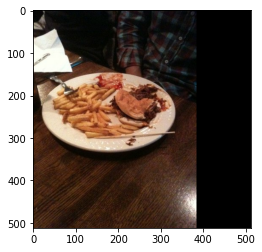

In [ ]:
plt.imshow(image[2]/255)

In [ ]:
# plt.imshow(image)
# plt.title(f'the class name: {class_names[label.numpy()]}')
# plt.axis('off')

In [ ]:
data_augmentation = tf.keras.Sequential([
                    tf.keras.layers.Resizing(224,224),
                    # tf.keras.layers.Rescaling(1/255), # efficientnet has built-in rescaling
                    tf.keras.layers.RandomFlip('horizontal'),
                    tf.keras.layers.RandomRotation(0.2),
                    tf.keras.layers.RandomZoom(0.2),
                    tf.keras.layers.RandomHeight(0.2),
                    tf.keras.layers.RandomWidth(0.2)], 
                    name ="data_augmentation")

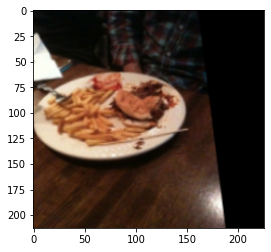

In [ ]:
plt.imshow(data_augmentation(image[2])/255)

In [ ]:
ckeckpointpath = 'modelcheck/food101.ckpt'
modelcheckpt = tf.keras.callbacks.ModelCheckpoint(ckeckpointpath, 
                                   monitor='val_acc', 
                                   verbose=0, 
                                   save_best_only=True, 
                                   save_weights_only=True)

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

x = data_augmentation(inputs)

x = base_model(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(101,activation='softmax',name='output_layer')(x)

model = tf.keras.Model(inputs,outputs,name='model')

model.compile(loss = 'sparse_categorical_crossentropy',
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

model.summary()

16719872/16705208 [==============================] - 0s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [ ]:
# train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_data,image_size=(256, 256))

In [ ]:
model.fit(train_data,epochs=5,batch_size=32,
          callbacks=[modelcheckpt, create_tensorboard_callback('tensorboard', 'food101')])

Epoch 1/5


2368/2368 [==============================] - 662s 272ms/step - loss: 2.3423 - accuracy: 0.4385
Epoch 2/5
2368/2368 [==============================] - 444s 188ms/step - loss: 1.8688 - accuracy: 0.5310
Epoch 3/5
2368/2368 [==============================] - 391s 165ms/step - loss: 1.7547 - accuracy: 0.5553
Epoch 4/5
2368/2368 [==============================] - 371s 157ms/step - loss: 1.6878 - accuracy: 0.5688
Epoch 5/5
2368/2368 [==============================] - 358s 151ms/step - loss: 1.6410 - accuracy: 0.5805


In [ ]:
model.evaluate(test_data)

790/790 [==============================] - 104s 131ms/step - loss: 1.2798 - accuracy: 0.6553


[1.2797584533691406, 0.6552871465682983]